# Implenting an Array API to use with Scikit-learn


In this tutorial, we will create an object that implements the Array API and use it in the `LinearDiscriminantAnalysis` example that is in the [scikit-learn docs](https://scikit-learn.org/stable/modules/array_api.html).

First, let's try LDA with normal numpy arrays.

We take a set of input vector and reduce the dimensionality to 1.

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import config_context

iris = datasets.load_iris()

X = iris.data
y = iris.target

def fit(X, y):
    with config_context(array_api_dispatch=True):
        lda = LinearDiscriminantAnalysis(n_components=2)
        X_r2 = lda.fit(X, y).transform(X)
        return X_r2

    target_names = iris.target_names
    plt.figure()
    colors = ["navy", "turquoise", "darkorange"]

    plt.figure()
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(
            X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("LDA of IRIS dataset")

    plt.show()
fit(X, y)

array([[ 8.06179978e+00, -3.00420621e-01],
       [ 7.12868772e+00,  7.86660426e-01],
       [ 7.48982797e+00,  2.65384488e-01],
       [ 6.81320057e+00,  6.70631068e-01],
       [ 8.13230933e+00, -5.14462530e-01],
       [ 7.70194674e+00, -1.46172097e+00],
       [ 7.21261762e+00, -3.55836209e-01],
       [ 7.60529355e+00,  1.16338380e-02],
       [ 6.56055159e+00,  1.01516362e+00],
       [ 7.34305989e+00,  9.47319209e-01],
       [ 8.39738652e+00, -6.47363392e-01],
       [ 7.21929685e+00,  1.09646389e-01],
       [ 7.32679599e+00,  1.07298943e+00],
       [ 7.57247066e+00,  8.05464137e-01],
       [ 9.84984300e+00, -1.58593698e+00],
       [ 9.15823890e+00, -2.73759647e+00],
       [ 8.58243141e+00, -1.83448945e+00],
       [ 7.78075375e+00, -5.84339407e-01],
       [ 8.07835876e+00, -9.68580703e-01],
       [ 8.02097451e+00, -1.14050366e+00],
       [ 7.49680227e+00,  1.88377220e-01],
       [ 7.58648117e+00, -1.20797032e+00],
       [ 8.68104293e+00, -8.77590154e-01],
       [ 6.

In [2]:
# import torch

# fit(torch.asarray(X), torch.asarray(y))

Now let's try to make a NDArray object that implements the Array API.

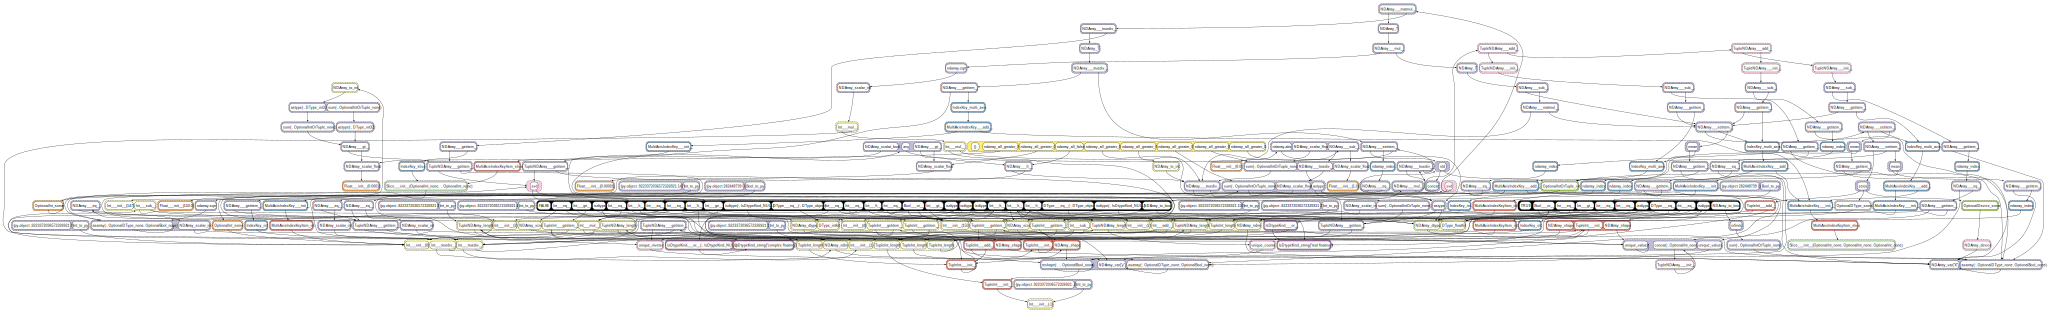

In [3]:
from egglog.exp.array_api import *


X_arr = NDArray.var("X")
y_arr = NDArray.var("y")

# Add values for the constants
egraph.register(
    rewrite(X_arr.dtype, runtime_ruleset).to(convert(X.dtype, DType)),
    rewrite(y_arr.dtype, runtime_ruleset).to(convert(y.dtype, DType)),
    rewrite(isfinite(sum(X_arr)).to_bool(), runtime_ruleset).to(TRUE),
    rewrite(isfinite(sum(y_arr)).to_bool(), runtime_ruleset).to(TRUE),
    rewrite(X_arr.shape, runtime_ruleset).to(convert(X.shape, TupleInt)),
    rewrite(y_arr.shape, runtime_ruleset).to(convert(y.shape, TupleInt)),
    rewrite(X_arr.size, runtime_ruleset).to(Int(X.size)),
    rewrite(y_arr.size, runtime_ruleset).to(Int(y.size)),
    rewrite(unique_values(y_arr).shape).to(TupleInt(Int(3))),
    rewrite(unique_values(y_arr).size).to(Int(3)),
)

with egraph:
    res = fit(X_arr, y_arr)
    egraph.display()

In [4]:
@egraph.register
def _optimizations(i: Int):
    yield rewrite(sqrt(NDArray.scalar_int(Int(0)))).to(NDArray.scalar_int(Int(0)))
    yield rewrite(i * Int(0)).to(Int(0))

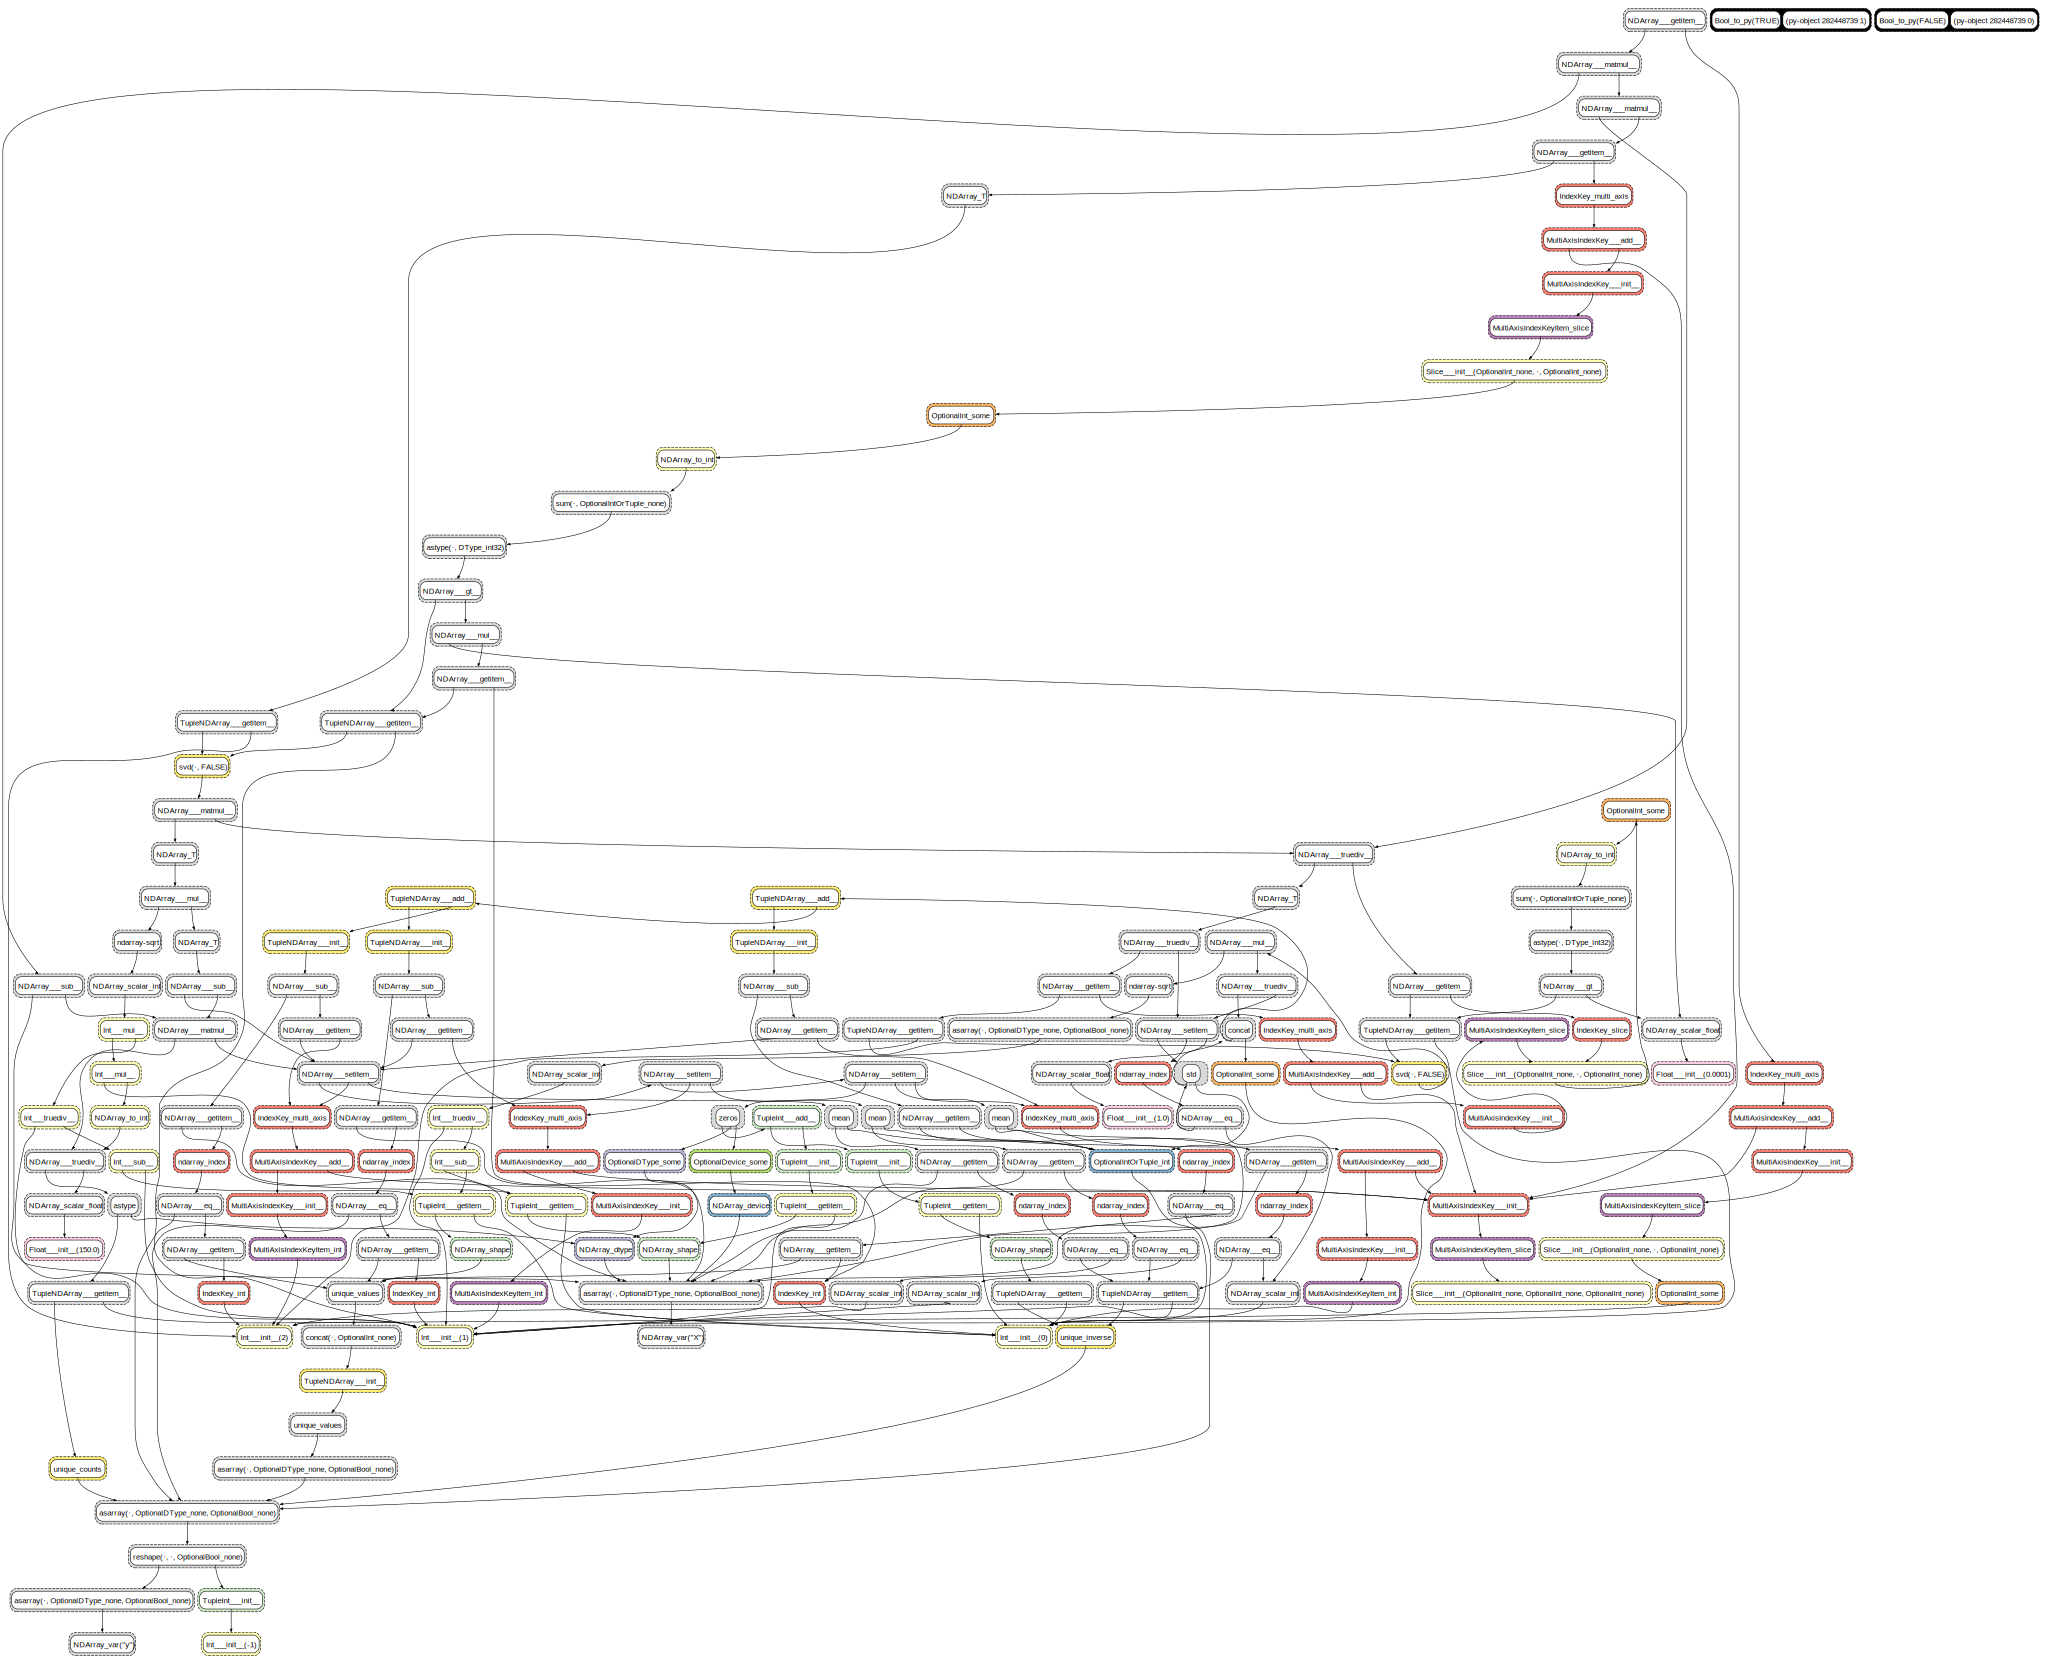

_NDArray_1 = asarray(NDArray.var("X"))
_NDArray_2 = asarray(reshape(asarray(NDArray.var("y")), TupleInt(Int(-1))))
_NDArray_3 = astype(unique_counts(_NDArray_2)[Int(1)], _NDArray_1.dtype) / NDArray.scalar_float(Float(150.0))
_NDArray_4 = zeros(
    TupleInt(unique_inverse(_NDArray_2)[Int(0)].shape[Int(0)]) + TupleInt(_NDArray_1.shape[Int(1)]), OptionalDType.some(_NDArray_1.dtype), OptionalDevice.some(_NDArray_1.device)
)
_MultiAxisIndexKey_1 = MultiAxisIndexKey(MultiAxisIndexKeyItem.slice(Slice()))
_IndexKey_1 = IndexKey.multi_axis(MultiAxisIndexKey(MultiAxisIndexKeyItem.int(Int(0))) + _MultiAxisIndexKey_1)
_NDArray_4[_IndexKey_1] = mean(_NDArray_1[ndarray_index(unique_inverse(_NDArray_2)[Int(1)] == NDArray.scalar_int(Int(0)))], OptionalIntOrTuple.int(Int(0)))
_IndexKey_2 = IndexKey.multi_axis(MultiAxisIndexKey(MultiAxisIndexKeyItem.int(Int(1))) + _MultiAxisIndexKey_1)
_NDArray_4[_IndexKey_2] = mean(_NDArray_1[ndarray_index(unique_inverse(_NDArray_2)[Int(1)] == NDArray.scalar_int(Int(1)))], OptionalIntOrTuple.int(Int(0)))
_IndexKey_3 = IndexKey.multi_axis(MultiAxisIndexKey(MultiAxisIndexKeyItem.int(Int(2))) + _MultiAxisIndexKey_1)
_NDArray_4[_IndexKey_3] = mean(_NDArray_1[ndarray_index(unique_inverse(_NDArray_2)[Int(1)] == NDArray.scalar_int(Int(2)))], OptionalIntOrTuple.int(Int(0)))
_NDArray_5 = unique_values(concat(TupleNDArray(unique_values(asarray(_NDArray_2)))))
_NDArray_6 = concat(
    TupleNDArray(_NDArray_1[ndarray_index(_NDArray_2 == _NDArray_5[IndexKey.int(Int(0))])] - _NDArray_4[_IndexKey_1])
    + (
        TupleNDArray(_NDArray_1[ndarray_index(_NDArray_2 == _NDArray_5[IndexKey.int(Int(1))])] - _NDArray_4[_IndexKey_2])
        + TupleNDArray(_NDArray_1[ndarray_index(_NDArray_2 == _NDArray_5[IndexKey.int(Int(2))])] - _NDArray_4[_IndexKey_3])
    ),
    OptionalInt.some(Int(0)),
)
_NDArray_7 = std(_NDArray_6, OptionalIntOrTuple.int(Int(0)))
_NDArray_7[ndarray_index(std(_NDArray_6, OptionalIntOrTuple.int(Int(0))) == NDArray.scalar_int(Int(0)))] = NDArray.scalar_float(Float(1.0))
_TupleNDArray_1 = svd(sqrt(asarray(NDArray.scalar_int(Int(1) / (_NDArray_1.shape[Int(0)] - _NDArray_5.shape[Int(0)])))) * (_NDArray_6 / _NDArray_7), FALSE)
_Slice_1 = Slice(OptionalInt.none, OptionalInt.some(sum(astype(_TupleNDArray_1[Int(1)] > NDArray.scalar_float(Float(0.0001)), DType.int32)).to_int()))
_NDArray_8 = (_TupleNDArray_1[Int(2)][IndexKey.multi_axis(MultiAxisIndexKey(MultiAxisIndexKeyItem.slice(_Slice_1)) + _MultiAxisIndexKey_1)] / _NDArray_7).T / _TupleNDArray_1[
    Int(1)
][IndexKey.slice(_Slice_1)]
_TupleNDArray_2 = svd(
    (sqrt(NDArray.scalar_int((_NDArray_1.shape[Int(0)] * _NDArray_3.to_int()) * (Int(1) / (_NDArray_5.shape[Int(0)] - Int(1))))) * (_NDArray_4 - (_NDArray_3 @ _NDArray_4)).T).T
    @ _NDArray_8,
    FALSE,
)
(
    (_NDArray_1 - (_NDArray_3 @ _NDArray_4))
    @ (
        _NDArray_8
        @ _TupleNDArray_2[Int(2)].T[
            IndexKey.multi_axis(
                _MultiAxisIndexKey_1
                + MultiAxisIndexKey(
                    MultiAxisIndexKeyItem.slice(
                        Slice(
                            OptionalInt.none,
                            OptionalInt.some(
                                sum(astype(_TupleNDArray_2[Int(1)] > (NDArray.scalar_float(Float(0.0001)) * _TupleNDArray_2[Int(1)][IndexKey.int(Int(0))]), DType.int32)).to_int()
                            ),
                        )
                    )
                )
            )
        ]
    )
)[IndexKey.multi_axis(_MultiAxisIndexKey_1 + MultiAxisIndexKey(MultiAxisIndexKeyItem.slice(Slice(OptionalInt.none, OptionalInt.some(Int(2))))))]

In [5]:
with egraph:
    egraph.run((run(runtime_ruleset) * 10 + run() * 10).saturate())
    res = egraph.extract(res)
    egraph.display()
res